In [31]:
# read in each file/ROI
# plot the coloc channel intensity for the detected spots
# plot the coloc channel intensity for the randomly placed spots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from skimage import filters
import numpy as np

home_dir = "/Users/snk218/Dropbox (NYU Langone Health)/mac_files"
img_dir = "holtlab/data_and_results/Farida_LINE1/spot_counting/20221030_LINE1"

df_dox = pd.read_csv(f"{home_dir}/{img_dir}/dox/results/all_spots.txt", sep='\t')
df_dox['roi']=df_dox['roi'].fillna('')

df_dox_random = pd.read_csv(f"{home_dir}/{img_dir}/dox/results/all_random_spots.txt", sep='\t')
df_dox_random['roi']=df_dox_random['roi'].fillna('')

In [43]:
def plot_intensity_kde(df, df_random, file_name, location, nrows, ncols, size):

    if(location != ''):
        cur_df = df[df.location==location]
        cur_df_random = df_random[df_random.location==location]
    else:
        cur_df = df
        cur_df_random = df_random
        
    cur_df = cur_df[cur_df.file_name==file_name]
    cur_random_df = cur_df_random[cur_df_random.file_name==file_name]

    fig,axs=plt.subplots(nrows, ncols, figsize=size)
    i=0; j=0
    for roi in cur_df.roi.unique():
        data = cur_df[cur_df.roi==roi]['coloc_ch_intensity']
        data_random = cur_random_df[cur_random_df.roi==roi]['coloc_ch_intensity']

        if(roi != '' and len(data)>0):
            #sns.histplot(x=data, ax=axs[i][j], #stat='probability', 
            #             bins=np.linspace(data.min(),data.max(),30)) #,kde=True,)
            #sns.histplot(x=data_random, ax=axs[i][j], #stat='probability', 
            #             bins=np.linspace(data.min(),data.max(),30)) #,kde=True,)
            
            sns.kdeplot(x=data_random, ax=axs[i][j], label='random spots')
            sns.kdeplot(x=data, ax=axs[i][j], label='detected spots')
            


            axs[i][j].set_title(f"{roi} ({len(data)})")
            
            if(i == 0 and j == 0):
                axs[i][j].legend()

            if(j == (ncols-1)):
                i+=1; j=0
            else:
                j+=1
    plt.tight_layout()
    plt.show()

In [65]:
def plot_intensity_kde2(df, df_random, file_name):
    
    fig,axs=plt.subplots(1, 3, figsize=(12,3))

    cur_df = df[df.file_name==file_name]
    cur_random_df = df_random[df_random.file_name==file_name]
    
    cur_df = cur_df[cur_df.roi!='']
    cur_random_df = cur_random_df[cur_random_df.roi!='']
    
    i=0
    for location in ['all','nuclear','cytoplasmic']:
        if(location != 'all'):
            cur_loc_df = cur_df[cur_df.location==location]
            cur_loc_df_random = cur_random_df[cur_random_df.location==location]
        else:
            cur_loc_df = cur_df
            cur_loc_df_random = cur_random_df
    
        data = cur_loc_df['coloc_ch_intensity']
        data_random = cur_loc_df_random['coloc_ch_intensity']
                    
        sns.kdeplot(x=data_random, ax=axs[i], label='random spots')
        sns.kdeplot(x=data, ax=axs[i], label='detected spots')
            
        axs[i].set_title(f"{location}: ({len(data)})")
        axs[i].legend()
        
        i += 1

    plt.tight_layout()
    plt.show()

In [66]:
for file_name in df_dox.file_name.unique():
    print(file_name)
    print(len(df_dox[df_dox.file_name==file_name]['roi'].unique()))

zstack_004
5
zstack_005
10
zstack_001
6
zstack_002
5
zstack_003
5


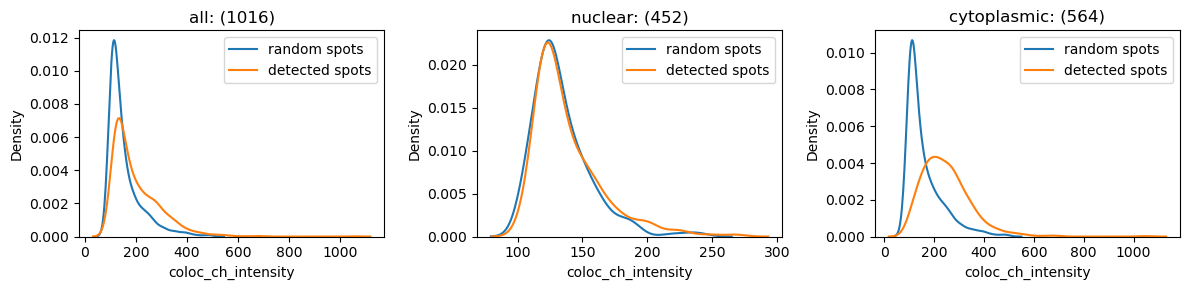

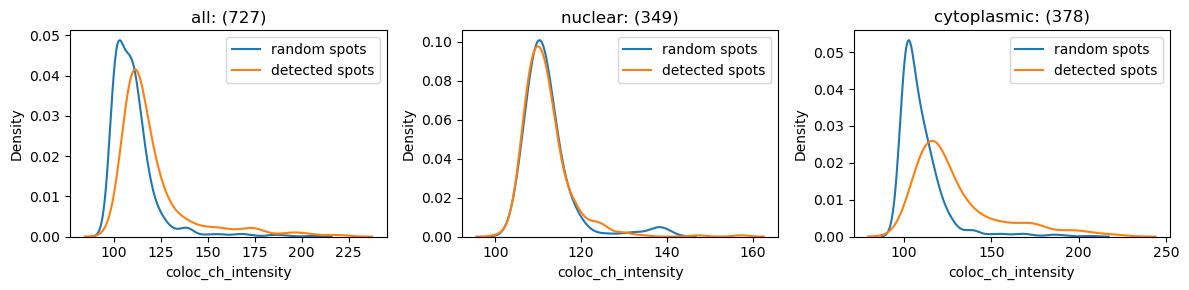

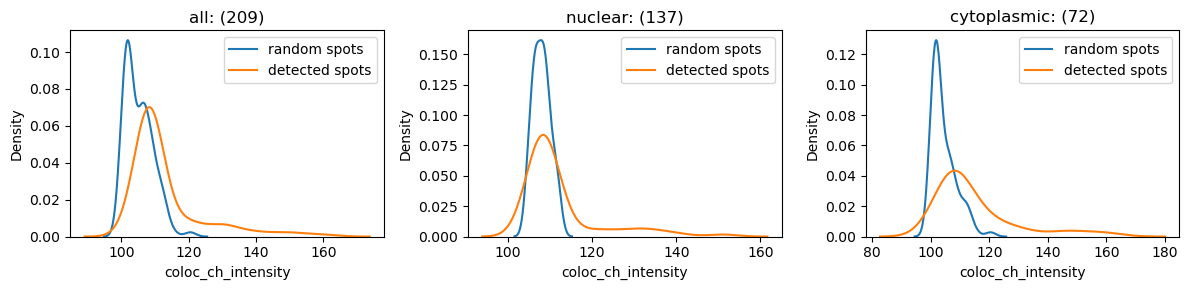

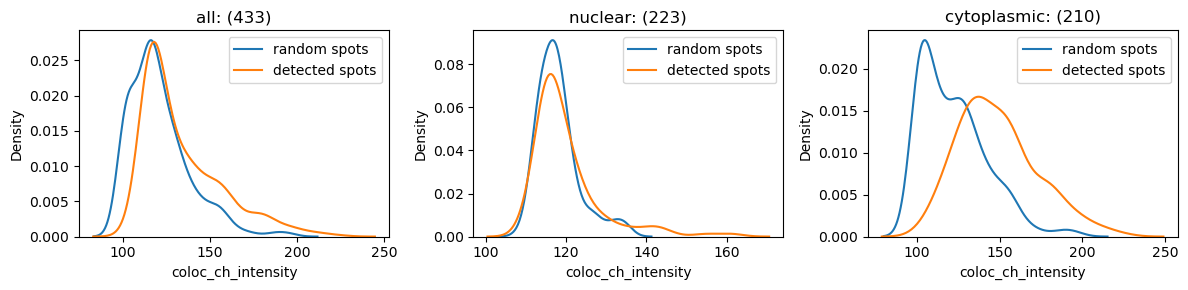

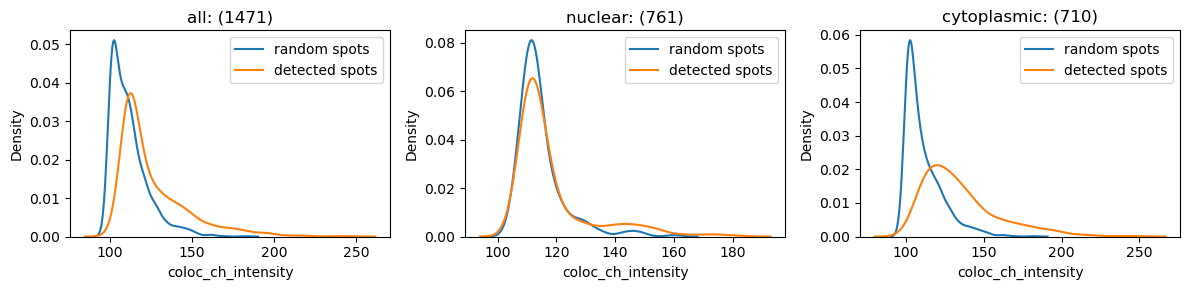

In [68]:
plot_intensity_kde2(df_dox, df_dox_random, 'zstack_001')
plot_intensity_kde2(df_dox, df_dox_random, 'zstack_002')
plot_intensity_kde2(df_dox, df_dox_random, 'zstack_003')
plot_intensity_kde2(df_dox, df_dox_random, 'zstack_004')
plot_intensity_kde2(df_dox, df_dox_random, 'zstack_005')

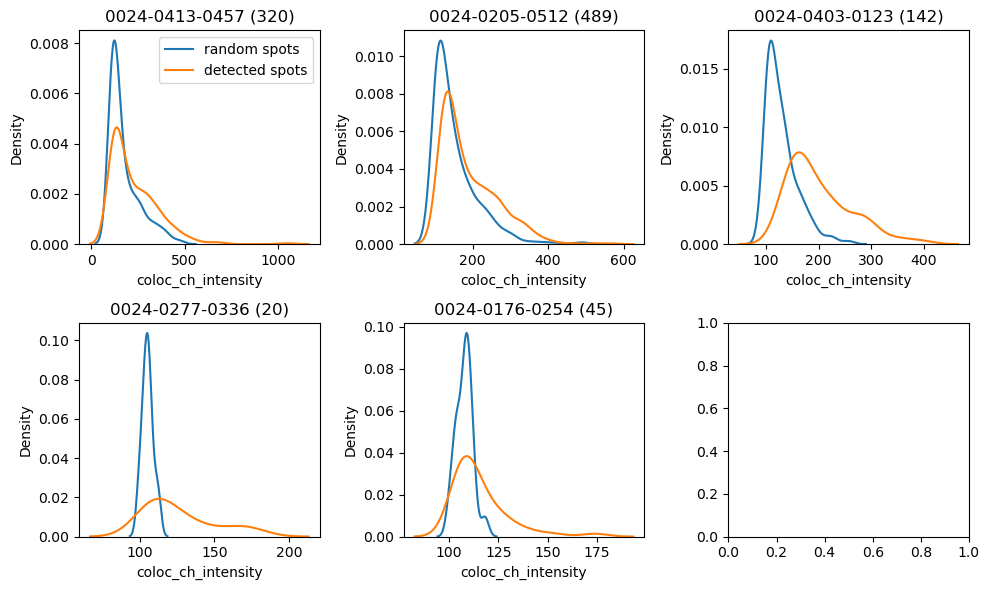

In [45]:
plot_intensity_kde(df_dox, df_dox_random, 'zstack_001', '', 2, 3, (10,6))

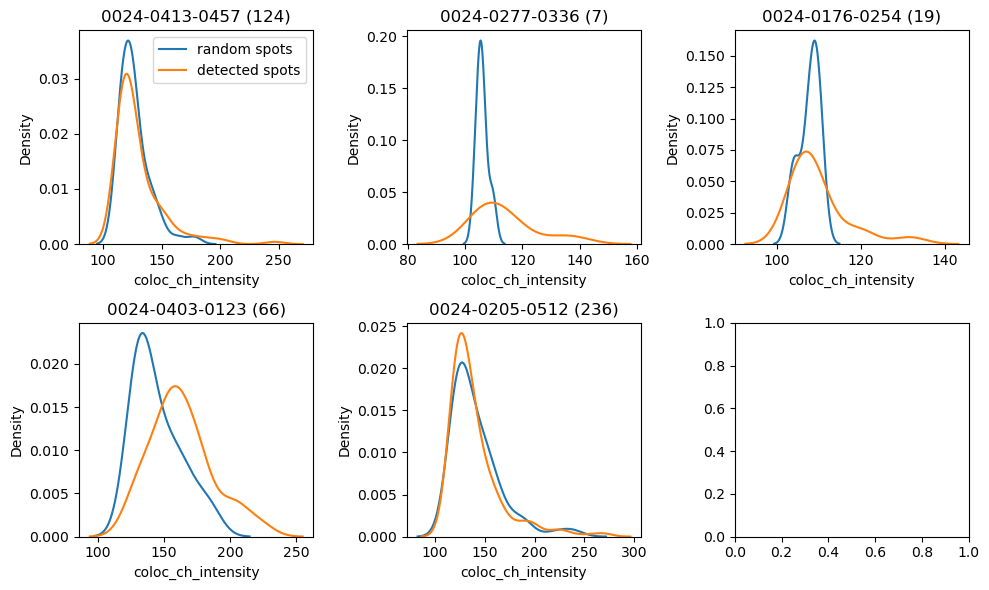

In [46]:
plot_intensity_kde(df_dox, df_dox_random, 'zstack_001', 'nuclear', 2, 3, (10,6))

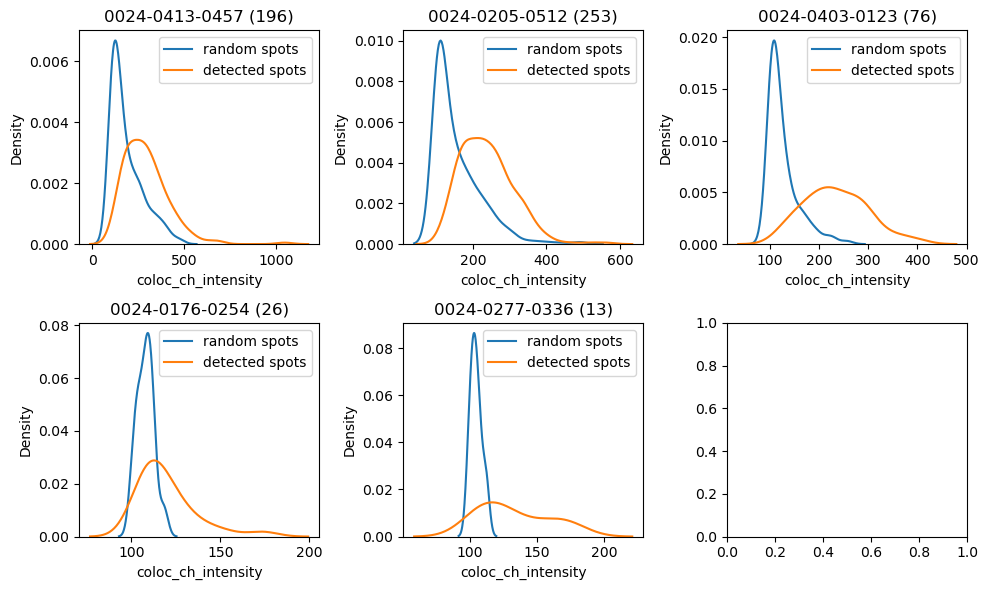

In [42]:
plot_intensity_kde(df_dox, df_dox_random, 'zstack_001', 'cytoplasmic', 2, 3, (10,6))

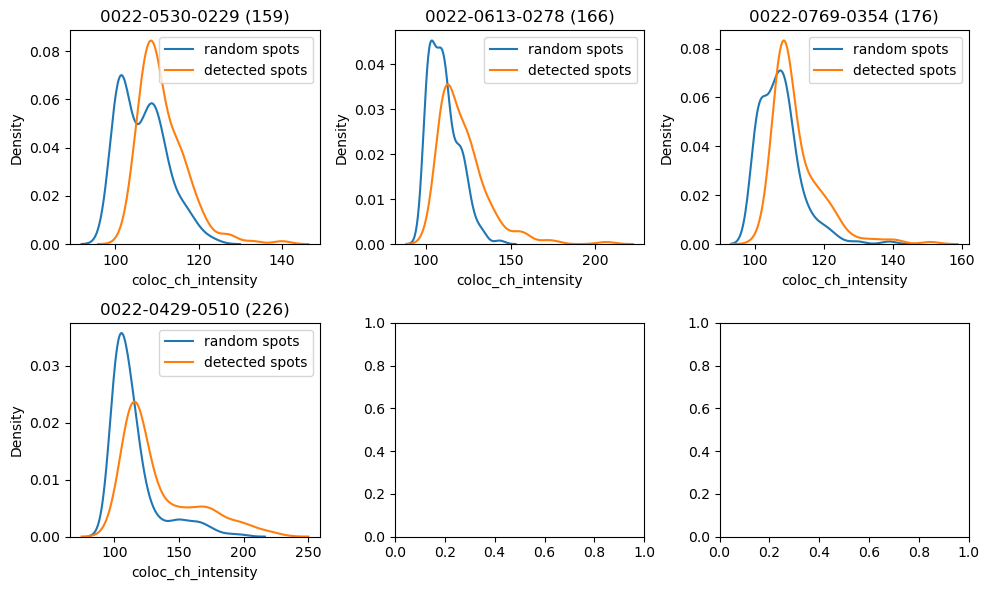

In [28]:
plot_intensity_kde('zstack_002', 2, 3, (10,6))

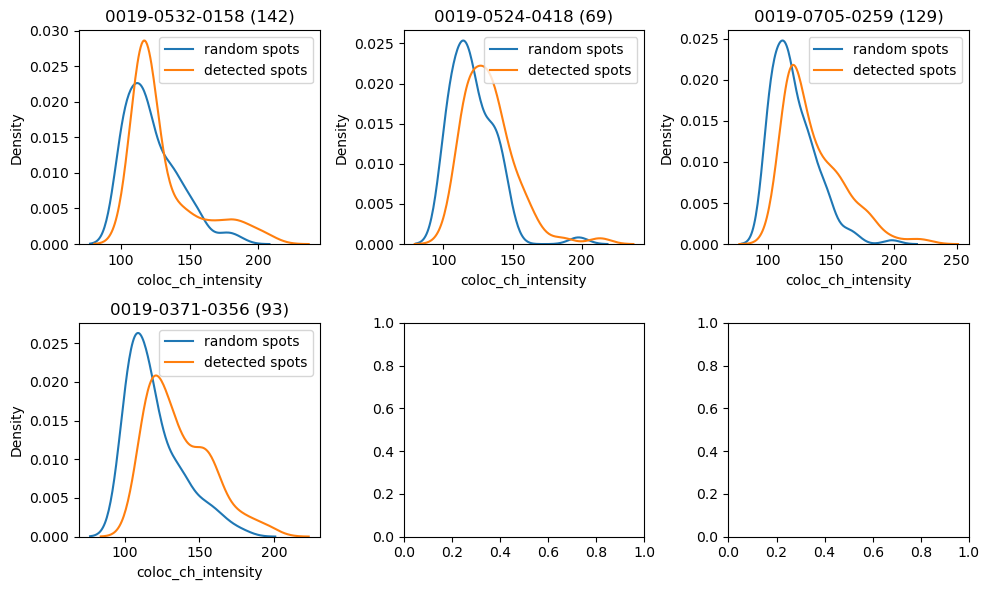

In [29]:
plot_intensity_kde('zstack_004', 2, 3, (10,6))

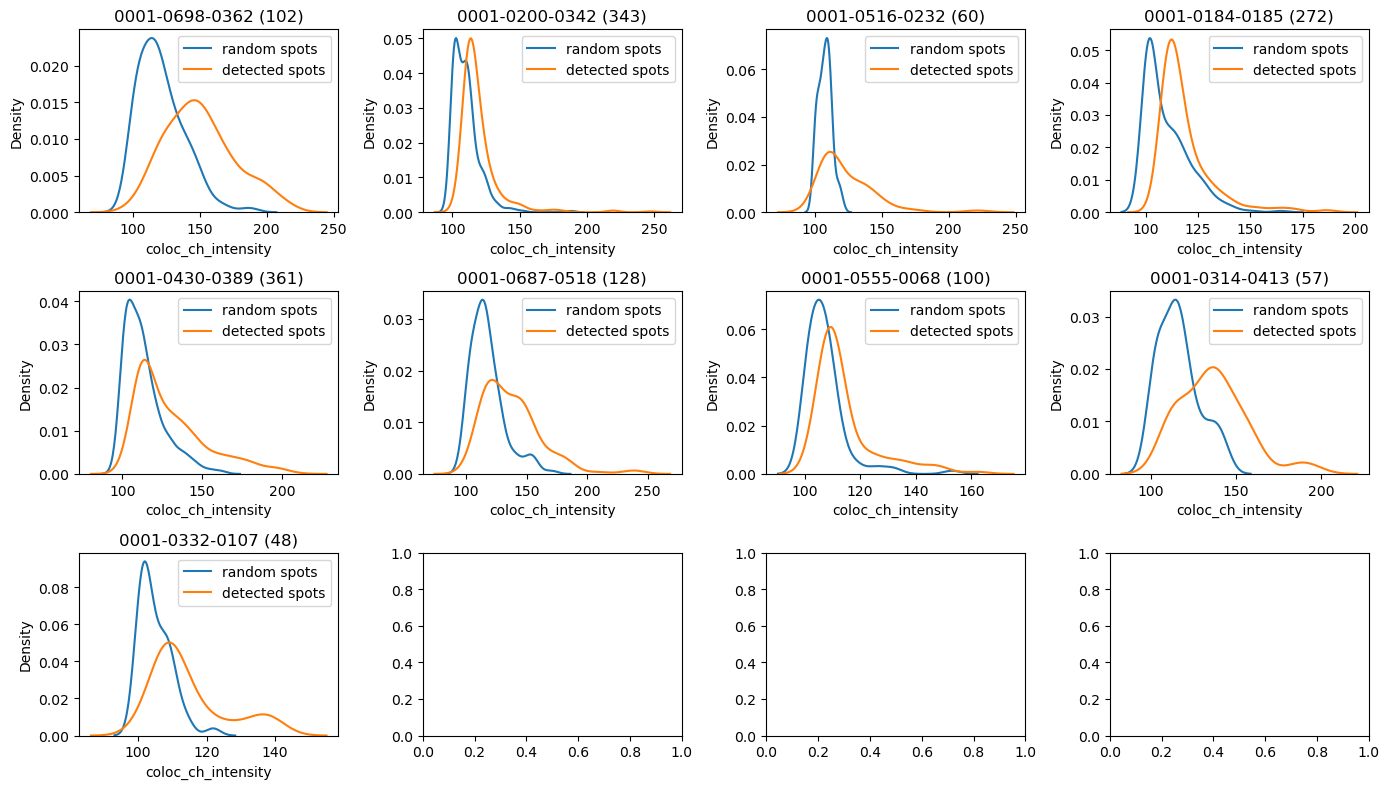

In [30]:
plot_intensity_kde('zstack_005', 3, 4, (14,8))